<a href="https://colab.research.google.com/github/mehtasaurav/Buy_Drinks/blob/master/Frouros_Concept_drift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
pip install frouros

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [43]:
np.random.seed(seed=31)
df = pd.read_csv("/content/drive/MyDrive/SDP/IoT_2020_b_0.01_fs.csv")
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, shuffle=False,random_state = 0)

#DDM BASED DETECTORS

##DDM Detector

Drift detected at index 1718
Accuracy: 97.382%
Precision: 97.301%
Recall: 97.382%
F1 Score: 97.332%


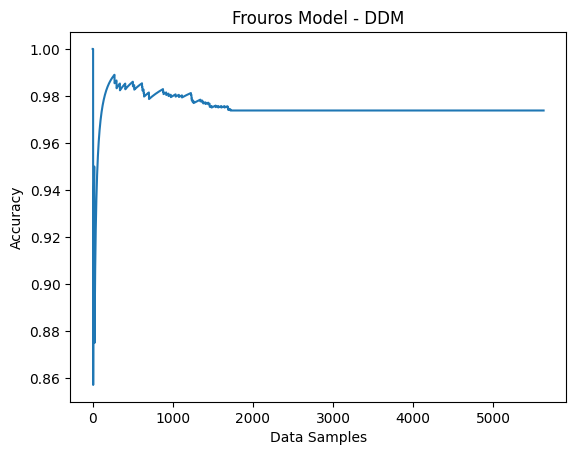

In [44]:
from frouros.detectors.concept_drift import DDM, DDMConfig

# IMPORTANT: Induce/simulate concept drift in the last part (20%)
# of y_test by modifying some labels (50% approx). Therefore, changing P(y|X))
drift_size = int(y_test.shape[0] * 0.2)
y_test_drift = y_test[-drift_size:]
modify_idx = np.random.rand(*y_test_drift.shape) <= 0.5
y_test_drift[modify_idx] = (y_test_drift[modify_idx] + 1) % len(np.unique(y_test))
y_test[-drift_size:] = y_test_drift

# Define and fit model
pipeline = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])
pipeline.fit(X_train, y_train)

# Detector configuration and instantiation
config = DDMConfig(warning_level=2.0, drift_level=3.0, min_num_instances=30,)
detector = DDM(config=config)

# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
y_preds = []
y_trues = []
drift_indexes = []
for i, (X, y_true) in enumerate(zip(X_test, y_test)):
    y_pred = pipeline.predict(X.reshape(1, -1))
    y_preds.append(y_pred)
    y_trues.append(y_true)
    error = 1 - int(y_pred == y_true)
    detector.update(value=error)
    status = detector.status
    if status["drift"]:
        print(f"Drift detected at index {i}")
        break

# Evaluation metrics
accuracy = accuracy_score(y_trues, y_preds)
precision = precision_score(y_trues, y_preds, average="weighted")
recall = recall_score(y_trues, y_preds, average="weighted")
f1 = f1_score(y_trues, y_preds, average="weighted")

print(f"Accuracy: {accuracy*100:.3f}"+"%")
print(f"Precision: {precision*100:.3f}"+"%")
print(f"Recall: {recall*100:.3f}"+"%")
print(f"F1 Score: {f1*100:.3f}"+"%")

# Plot accuracy vs. data samples
n_samples = len(y_test)
x = np.arange(n_samples)
accs = np.zeros(n_samples)
for i in range(n_samples):
    accs[i] = accuracy_score(y_trues[: i + 1], y_preds[: i + 1])
plt.plot(x, accs)
for drift_index in drift_indexes:
    plt.axvline(x=drift_index, linestyle="--", color="r")
plt.title("Frouros Model - DDM")
plt.xlabel("Data Samples")
plt.ylabel("Accuracy")
plt.show()

##HDDM-A Detector

Drift detected at index 4509
Accuracy: 97.228%
Precision: 97.215%
Recall: 97.228%
F1 Score: 97.221%


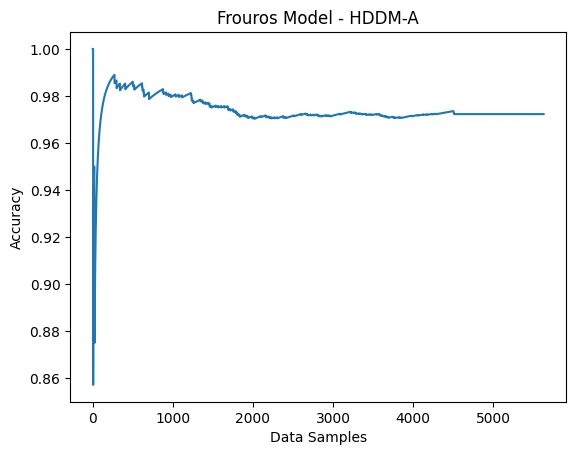

In [45]:
from frouros.detectors.concept_drift import HDDMA, HDDMAConfig

# IMPORTANT: Induce/simulate concept drift in the last part (20%)
# of y_test by modifying some labels (50% approx). Therefore, changing P(y|X))
drift_size = int(y_test.shape[0] * 0.2)
y_test_drift = y_test[-drift_size:]
modify_idx = np.random.rand(*y_test_drift.shape) <= 0.5
y_test_drift[modify_idx] = (y_test_drift[modify_idx] + 1) % len(np.unique(y_test))
y_test[-drift_size:] = y_test_drift

# Define and fit model
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LogisticRegression()),
    ]
)
pipeline.fit(X=X_train, y=y_train)

# Detector configuration and instantiation
config = HDDMAConfig()
detector = HDDMA(config=config)

# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
y_preds = []
y_trues = []
drift_indexes = []
for i, (X, y_true) in enumerate(zip(X_test, y_test)):
    y_pred = pipeline.predict(X.reshape(1, -1))
    y_preds.append(y_pred)
    y_trues.append(y_true)
    error = 1 - int(y_pred == y_true)
    detector.update(value=error)
    status = detector.status
    if status["drift"]:
        print(f"Drift detected at index {i}")
        break

# Evaluation metrics
accuracy = accuracy_score(y_trues, y_preds)
precision = precision_score(y_trues, y_preds, average="weighted")
recall = recall_score(y_trues, y_preds, average="weighted")
f1 = f1_score(y_trues, y_preds, average="weighted")

print(f"Accuracy: {accuracy*100:.3f}"+"%")
print(f"Precision: {precision*100:.3f}"+"%")
print(f"Recall: {recall*100:.3f}"+"%")
print(f"F1 Score: {f1*100:.3f}"+"%")

# Plot accuracy vs. data samples
n_samples = len(y_test)
x = np.arange(n_samples)
accs = np.zeros(n_samples)
for i in range(n_samples):
    accs[i] = accuracy_score(y_trues[: i + 1], y_preds[: i + 1])
plt.plot(x, accs)
for drift_index in drift_indexes:
    plt.axvline(x=drift_index, linestyle="--", color="r")
plt.title("Frouros Model - HDDM-A")
plt.xlabel("Data Samples")
plt.ylabel("Accuracy")
plt.show()


##HDDM-W DETECTOR

Drift detected at index 4550
Accuracy: 96.902%
Precision: 96.842%
Recall: 96.902%
F1 Score: 96.869%


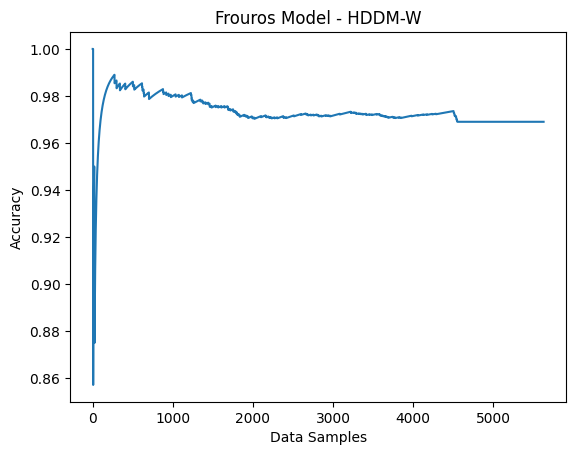

In [46]:
from frouros.detectors.concept_drift import HDDMW, HDDMWConfig

# IMPORTANT: Induce/simulate concept drift in the last part (20%)
# of y_test by modifying some labels (50% approx). Therefore, changing P(y|X))
drift_size = int(y_test.shape[0] * 0.2)
y_test_drift = y_test[-drift_size:]
modify_idx = np.random.rand(*y_test_drift.shape) <= 0.5
y_test_drift[modify_idx] = (y_test_drift[modify_idx] + 1) % len(np.unique(y_test))
y_test[-drift_size:] = y_test_drift

# Define and fit model
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LogisticRegression()),
    ]
)
pipeline.fit(X=X_train, y=y_train)

# Detector configuration and instantiation
config = HDDMWConfig()
detector = HDDMW(config=config)

# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
y_preds = []
y_trues = []
drift_indexes = []
for i, (X, y_true) in enumerate(zip(X_test, y_test)):
    y_pred = pipeline.predict(X.reshape(1, -1))
    y_preds.append(y_pred)
    y_trues.append(y_true)
    error = 1 - int(y_pred == y_true)
    detector.update(value=error)
    status = detector.status
    if status["drift"]:
        print(f"Drift detected at index {i}")
        break

# Evaluation metrics
accuracy = accuracy_score(y_trues, y_preds)
precision = precision_score(y_trues, y_preds, average="weighted")
recall = recall_score(y_trues, y_preds, average="weighted")
f1 = f1_score(y_trues, y_preds, average="weighted")

print(f"Accuracy: {accuracy*100:.3f}"+"%")
print(f"Precision: {precision*100:.3f}"+"%")
print(f"Recall: {recall*100:.3f}"+"%")
print(f"F1 Score: {f1*100:.3f}"+"%")

# Plot accuracy vs. data samples
n_samples = len(y_test)
x = np.arange(n_samples)
accs = np.zeros(n_samples)
for i in range(n_samples):
    accs[i] = accuracy_score(y_trues[: i + 1], y_preds[: i + 1])
plt.plot(x, accs)
for drift_index in drift_indexes:
    plt.axvline(x=drift_index, linestyle="--", color="r")
plt.title("Frouros Model - HDDM-W")
plt.xlabel("Data Samples")
plt.ylabel("Accuracy")
plt.show()


#WINDOW BASED DETECTORS


##ADWIN DETECTOR

Drift detected at index 4575
Accuracy: 96.613%
Precision: 96.506%
Recall: 96.613%
F1 Score: 96.551%


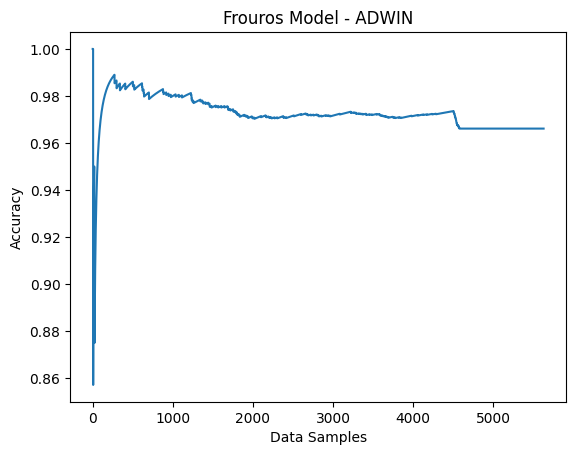

In [47]:
from frouros.detectors.concept_drift import ADWIN, ADWINConfig

# IMPORTANT: Induce/simulate concept drift in the last part (20%)
# of y_test by modifying some labels (50% approx). Therefore, changing P(y|X))
drift_size = int(y_test.shape[0] * 0.2)
y_test_drift = y_test[-drift_size:]
modify_idx = np.random.rand(*y_test_drift.shape) <= 0.5
y_test_drift[modify_idx] = (y_test_drift[modify_idx] + 1) % len(np.unique(y_test))
y_test[-drift_size:] = y_test_drift

# Define and fit model
pipeline = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])
pipeline.fit(X_train, y_train)

# Detector configuration and instantiation
config = ADWINConfig()
detector = ADWIN(config=config)

# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
y_preds = []
y_trues = []
drift_indexes = []
for i, (X, y_true) in enumerate(zip(X_test, y_test)):
    y_pred = pipeline.predict(X.reshape(1, -1))
    y_preds.append(y_pred)
    y_trues.append(y_true)
    error = 1 - int(y_pred == y_true)
    detector.update(value=error)
    status = detector.status
    if status["drift"]:
        print(f"Drift detected at index {i}")
        break

# Evaluation metrics
accuracy = accuracy_score(y_trues, y_preds)
precision = precision_score(y_trues, y_preds, average="weighted")
recall = recall_score(y_trues, y_preds, average="weighted")
f1 = f1_score(y_trues, y_preds, average="weighted")

print(f"Accuracy: {accuracy*100:.3f}"+"%")
print(f"Precision: {precision*100:.3f}"+"%")
print(f"Recall: {recall*100:.3f}"+"%")
print(f"F1 Score: {f1*100:.3f}"+"%")

# Plot accuracy vs. data samples
n_samples = len(y_test)
x = np.arange(n_samples)
accs = np.zeros(n_samples)
for i in range(n_samples):
    accs[i] = accuracy_score(y_trues[: i + 1], y_preds[: i + 1])
plt.plot(x, accs)
for drift_index in drift_indexes:
    plt.axvline(x=drift_index, linestyle="--", color="r")
plt.title("Frouros Model - ADWIN")
plt.xlabel("Data Samples")
plt.ylabel("Accuracy")
plt.show()

## KSWIN DETECTOR

Drift detected at index 4535
Accuracy: 96.958%
Precision: 96.887%
Recall: 96.958%
F1 Score: 96.918%


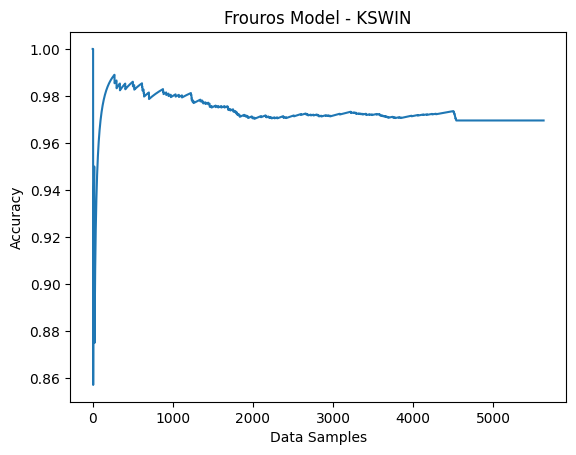

In [48]:
from frouros.detectors.concept_drift import KSWIN, KSWINConfig

# IMPORTANT: Induce/simulate concept drift in the last part (20%)
# of y_test by modifying some labels (50% approx). Therefore, changing P(y|X))
drift_size = int(y_test.shape[0] * 0.2)
y_test_drift = y_test[-drift_size:]
modify_idx = np.random.rand(*y_test_drift.shape) <= 0.5
y_test_drift[modify_idx] = (y_test_drift[modify_idx] + 1) % len(np.unique(y_test))
y_test[-drift_size:] = y_test_drift

# Define and fit model
pipeline = Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())])
pipeline.fit(X_train, y_train)

# Detector configuration and instantiation
config = KSWINConfig()
detector = KSWIN(config=config)

# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
y_preds = []
y_trues = []
drift_indexes = []
for i, (X, y_true) in enumerate(zip(X_test, y_test)):
    y_pred = pipeline.predict(X.reshape(1, -1))
    y_preds.append(y_pred)
    y_trues.append(y_true)
    error = 1 - int(y_pred == y_true)
    detector.update(value=error)
    status = detector.status
    if status["drift"]:
        print(f"Drift detected at index {i}")
        break

# Evaluation metrics
accuracy = accuracy_score(y_trues, y_preds)
precision = precision_score(y_trues, y_preds, average="weighted")
recall = recall_score(y_trues, y_preds, average="weighted")
f1 = f1_score(y_trues, y_preds, average="weighted")

print(f"Accuracy: {accuracy*100:.3f}"+"%")
print(f"Precision: {precision*100:.3f}"+"%")
print(f"Recall: {recall*100:.3f}"+"%")
print(f"F1 Score: {f1*100:.3f}"+"%")

# Plot accuracy vs. data samples
n_samples = len(y_test)
x = np.arange(n_samples)
accs = np.zeros(n_samples)
for i in range(n_samples):
    accs[i] = accuracy_score(y_trues[: i + 1], y_preds[: i + 1])
plt.plot(x, accs)
for drift_index in drift_indexes:
    plt.axvline(x=drift_index, linestyle="--", color="r")
plt.title("Frouros Model - KSWIN")
plt.xlabel("Data Samples")
plt.ylabel("Accuracy")
plt.show()